In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray();
from keras.datasets import cifar10
from keras.layers import Dense, Conv2D, Flatten, Dropout, SpatialDropout2D
from keras.optimizers import SGD
from keras.models import Sequential
import numpy as np
from skimage.data import camera, chelsea, astronaut
from skimage.exposure import equalize_hist, equalize_adapthist
import skimage.filters
from skimage.color import rgb2gray
from skimage.transform import resize 
from transforms import unsharp_mask, original #sharpened = original + (original − blurred) × amount
from functools import partial
from utils import display_transforms
import warnings
try:
    from jupyterthemes import jtplot
    jtplot.style()
except:
    pass
warnings.filterwarnings("ignore")

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<Figure size 432x288 with 0 Axes>

In [2]:
imsize = 32
(cifar_train, cifar_train_labels), (cifar_test, cifar_test_labels) = cifar10.load_data()
cifar_train, cifar_test = rgb2gray(cifar_train), rgb2gray(cifar_test)
test_images = [resize(rgb2gray(im), (imsize, imsize)) for im in (camera(), chelsea(), astronaut())]

ops = {
    'Original':original,
    'Histogram Equalization': equalize_hist,
    'Adaptive Histogram Equalization': partial(equalize_adapthist, kernel_size=imsize//4),
    'Unsharp mask': partial(unsharp_mask, amount=1.0)
}

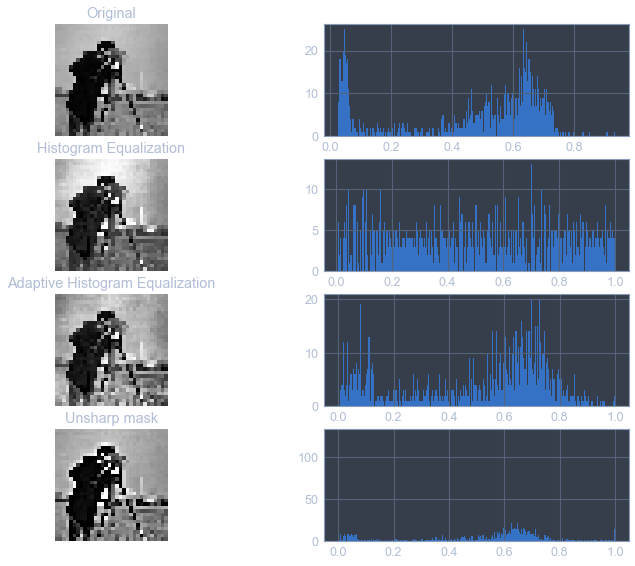

In [3]:
display_transforms(test_images[0], ops)

In [4]:
optimizer = SGD(lr=0.2, momentum=0.01)
MLP = Sequential([
    Flatten(input_shape=(imsize,imsize,1)),
    Dense(512, activation='relu'),
    Dropout(rate=0.1),
    Dense(imsize**2, activation='tanh')
])

CNN = Sequential([
    Conv2D(4, kernel_size=5, input_shape=(imsize,imsize,1), activation='relu'),
    Conv2D(8, kernel_size=5, activation='relu'),
    Conv2D(16, kernel_size=5, activation='relu'),
    SpatialDropout2D(rate=0.1),
    Flatten(),
    Dense(imsize**2, activation='tanh')
])

MLP.compile(optimizer=optimizer, loss='mse')
CNN.compile(optimizer=optimizer, loss='mse')

In [5]:
cifar_ahe = np.array([ops['Adaptive Histogram Equalization'](im) for im in cifar_train])

In [7]:
#Add single channel additional dimension
c_train = np.expand_dims(cifar_train, 3)
ahe_target = np.expand_dims(cifar_ahe, 3).reshape(cifar_ahe.shape[0], -1)

#normalize in -1,1
c_train = 2*((c_train - c_train.min())/(c_train.max() - c_train.min())) - 1
ahe_target = 2*((ahe_target - ahe_target.min())/(ahe_target.max() - ahe_target.min())) - 1

Train on 40000 samples, validate on 10000 samples
Epoch 1/200
40000/40000 [==============================] - 4s 104us/step - loss: 0.2611 - val_loss: 0.2177
Epoch 2/200
40000/40000 [==============================] - 4s 94us/step - loss: 0.2118 - val_loss: 0.1921
Epoch 3/200
40000/40000 [==============================] - 4s 94us/step - loss: 0.1915 - val_loss: 0.1760
Epoch 4/200
40000/40000 [==============================] - 4s 96us/step - loss: 0.1778 - val_loss: 0.1643
Epoch 5/200
40000/40000 [==============================] - 4s 98us/step - loss: 0.1674 - val_loss: 0.1551
Epoch 6/200
40000/40000 [==============================] - 4s 97us/step - loss: 0.1591 - val_loss: 0.1476- ET
Epoch 7/200
40000/40000 [==============================] - 4s 100us/step - loss: 0.1522 - val_loss: 0.1412
Epoch 8/200
40000/40000 [==============================] - 4s 99us/step - loss: 0.1463 - val_loss: 0.1357
Epoch 9/200
40000/40000 [==============================] - 4s 99us/step - loss: 0.1411 - val_los

Epoch 77/200
40000/40000 [==============================] - 5s 117us/step - loss: 0.0710 - val_loss: 0.0600
Epoch 78/200
40000/40000 [==============================] - 4s 110us/step - loss: 0.0707 - val_loss: 0.0598
Epoch 79/200
40000/40000 [==============================] - 4s 108us/step - loss: 0.0706 - val_loss: 0.0596
Epoch 80/200
40000/40000 [==============================] - 4s 106us/step - loss: 0.0704 - val_loss: 0.0594
Epoch 81/200
40000/40000 [==============================] - 4s 99us/step - loss: 0.0701 - val_loss: 0.0591
Epoch 82/200
40000/40000 [==============================] - 4s 106us/step - loss: 0.0700 - val_loss: 0.0589
Epoch 83/200
40000/40000 [==============================] - 4s 101us/step - loss: 0.0698 - val_loss: 0.0588
Epoch 84/200
40000/40000 [==============================] - 4s 96us/step - loss: 0.0695 - val_loss: 0.0586
Epoch 85/200
40000/40000 [==============================] - 4s 99us/step - loss: 0.0694 - val_loss: 0.0584
Epoch 86/200
40000/40000 [=====

40000/40000 [==============================] - 4s 99us/step - loss: 0.0625 - val_loss: 0.0513
Epoch 153/200
40000/40000 [==============================] - 4s 95us/step - loss: 0.0625 - val_loss: 0.0513
Epoch 154/200
40000/40000 [==============================] - 4s 97us/step - loss: 0.0624 - val_loss: 0.0512
Epoch 155/200
40000/40000 [==============================] - 4s 103us/step - loss: 0.0623 - val_loss: 0.0511
Epoch 156/200
40000/40000 [==============================] - 4s 103us/step - loss: 0.0622 - val_loss: 0.0511
Epoch 157/200
40000/40000 [==============================] - 4s 97us/step - loss: 0.0622 - val_loss: 0.0511
Epoch 158/200
40000/40000 [==============================] - 4s 99us/step - loss: 0.0621 - val_loss: 0.0511
Epoch 159/200
40000/40000 [==============================] - 4s 97us/step - loss: 0.0621 - val_loss: 0.0509
Epoch 160/200
40000/40000 [==============================] - 4s 98us/step - loss: 0.0621 - val_loss: 0.0509
Epoch 161/200
40000/40000 [=============

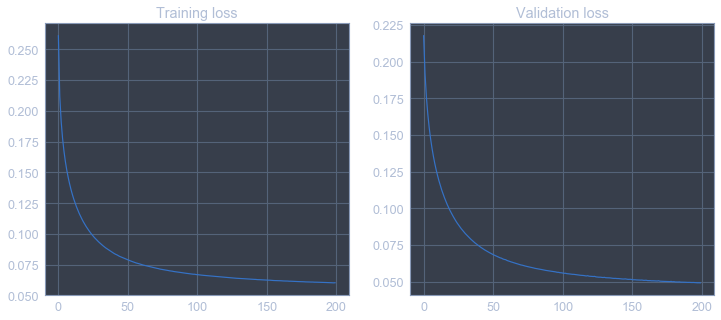

In [8]:
mlp_history = MLP.fit(c_train, ahe_target, batch_size=64, epochs=200, validation_split=0.2)

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(mlp_history.history['loss'])
plt.title('Training loss')
plt.subplot(1, 2, 2)
plt.plot(mlp_history.history['val_loss'])
plt.title('Validation loss');

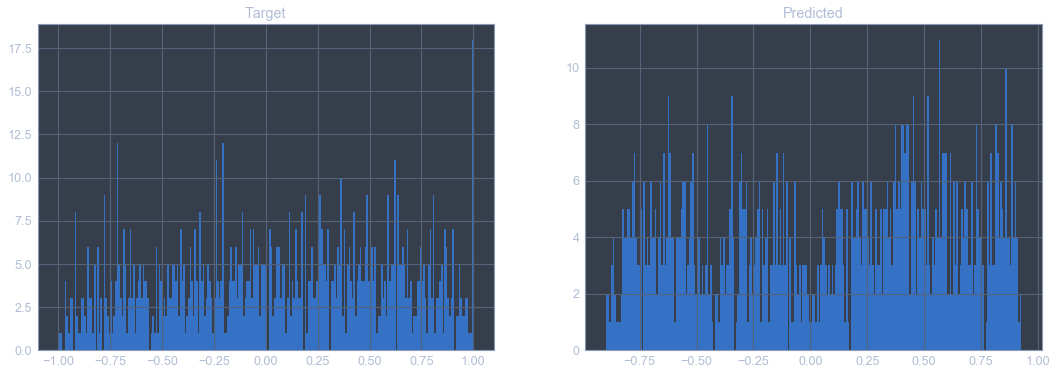

In [34]:
idx = 7
plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)
plt.hist(ahe_target[idx].ravel(),256)
plt.title('Target')
plt.subplot(1, 2, 2)
plt.hist(MLP.predict(c_train[idx:idx+1],batch_size=1)[0],256)
plt.title('Predicted')
plt.show()

Train on 40000 samples, validate on 10000 samples
Epoch 1/200
40000/40000 [==============================] - 37s 913us/step - loss: 0.2858 - val_loss: 0.2840
Epoch 2/200
40000/40000 [==============================] - 41s 1ms/step - loss: 0.2726 - val_loss: 0.2490
Epoch 3/200
40000/40000 [==============================] - 36s 909us/step - loss: 0.2301 - val_loss: 0.2065
Epoch 4/200
40000/40000 [==============================] - 36s 902us/step - loss: 0.2047 - val_loss: 0.1904
Epoch 5/200
40000/40000 [==============================] - 36s 897us/step - loss: 0.1930 - val_loss: 0.1812
Epoch 6/200
40000/40000 [==============================] - 39s 964us/step - loss: 0.1849 - val_loss: 0.1745
Epoch 7/200
40000/40000 [==============================] - 36s 904us/step - loss: 0.1778 - val_loss: 0.1653
Epoch 8/200
40000/40000 [==============================] - 38s 958us/step - loss: 0.1712 - val_loss: 0.1590
Epoch 9/200
40000/40000 [==============================] - 36s 899us/step - loss: 0.1643

Epoch 76/200
40000/40000 [==============================] - 40s 989us/step - loss: 0.0732 - val_loss: 0.0637
Epoch 77/200
40000/40000 [==============================] - 36s 901us/step - loss: 0.0729 - val_loss: 0.0675
Epoch 78/200
40000/40000 [==============================] - 37s 918us/step - loss: 0.0730 - val_loss: 0.0627
Epoch 79/200
40000/40000 [==============================] - 37s 915us/step - loss: 0.0724 - val_loss: 0.0662
Epoch 80/200
40000/40000 [==============================] - 39s 973us/step - loss: 0.0722 - val_loss: 0.0624
Epoch 81/200
40000/40000 [==============================] - 36s 901us/step - loss: 0.0721 - val_loss: 0.0633
Epoch 82/200
40000/40000 [==============================] - 36s 903us/step - loss: 0.0716 - val_loss: 0.0627
Epoch 83/200
40000/40000 [==============================] - 36s 905us/step - loss: 0.0714 - val_loss: 0.0640
Epoch 84/200
40000/40000 [==============================] - 37s 920us/step - loss: 0.0714 - val_loss: 0.0622
Epoch 85/200
40000/

Epoch 151/200
40000/40000 [==============================] - 39s 981us/step - loss: 0.0610 - val_loss: 0.0515
Epoch 152/200
40000/40000 [==============================] - 39s 976us/step - loss: 0.0607 - val_loss: 0.0530
Epoch 153/200
40000/40000 [==============================] - 38s 951us/step - loss: 0.0609 - val_loss: 0.0517
Epoch 154/200
40000/40000 [==============================] - 39s 963us/step - loss: 0.0609 - val_loss: 0.0512
Epoch 155/200
40000/40000 [==============================] - 35s 870us/step - loss: 0.0604 - val_loss: 0.0554
Epoch 156/200
40000/40000 [==============================] - 36s 890us/step - loss: 0.0604 - val_loss: 0.0511
Epoch 157/200
40000/40000 [==============================] - 36s 895us/step - loss: 0.0603 - val_loss: 0.0515
Epoch 158/200
40000/40000 [==============================] - 36s 889us/step - loss: 0.0602 - val_loss: 0.0508
Epoch 159/200
40000/40000 [==============================] - 36s 901us/step - loss: 0.0600 - val_loss: 0.0502
Epoch 160/

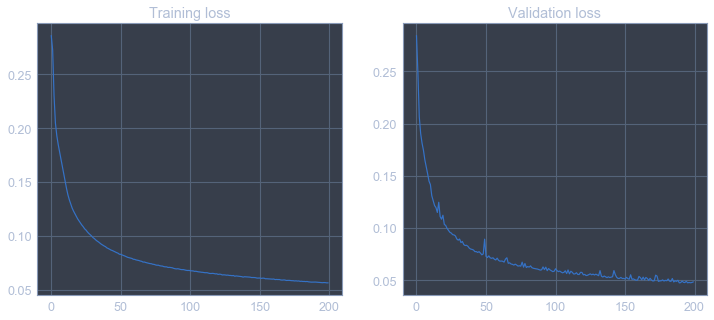

In [35]:
cnn_history = CNN.fit(c_train, ahe_target, batch_size=128, epochs=200, validation_split=0.2)

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'])
plt.title('Training loss')
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['val_loss'])
plt.title('Validation loss');

In [36]:
CNN.save('my_model.h5')